In [1]:
import numpy as np
import os
import pickle
import pprint as pp
import matplotlib.pyplot as plt
from heapq import nsmallest


In [2]:
def getDataFromFile(filename):
    with open(filename, 'rb') as f:
        x = pickle.load(f)
        print(f'Retreived Data from {filename}')
        return x
def getDataFromDatFile(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            item = line.rstrip()
            data.append(item)
        return data
def writeDataToFile(data, filename):
    outfile = open(filename,'wb')
    pickle.dump(data,outfile)
    outfile.close()
    print(f'wrote data to {filename}')


In [3]:
def getMinimums(data, windowSize, k=0):
    ret = []
    if k == 0:
        for i in range(0, len(data)-windowSize, windowSize):
            ret.append(np.min(data[i:i+windowSize]))
    else: 
        ret = getKthMinimums(data, windowSize, k)
    return ret
def getKthMinimums(data, windowSize, k):
    ret = []
    for i in range(0, len(data)-windowSize, windowSize):
        a = sorted(data[i:i+windowSize])
        ret.append(a[k])
    return ret
def twoWindow(data, windowSize=16, jump1=80, short=False):
    if len(data)/2 < windowSize:
        print(f'too little data {len(data)} to run twoWindow with window size {windowSize}')
        return 0, [], []
    jumps = []
    flag = 0
    mins = getMinimums(data, windowSize)
    for i in range(len(mins) - 1):
        if mins[i+1] - mins[i] >= jump1:
            jumps.append(i)
            flag = 1
            if short:
                return flag, mins, jumps
    return flag, mins, jumps 
def threeWindow(data, windowSize=16, jump1=80, jump2=2, short=False):
    if len(data)/3 < windowSize:
        print(f'too little data {len(data)} to run threeWindow with window size {windowSize}')
        return 0, [], [], []
    jumps = [] # index of jumps
    bloats = []
    flag = 0 # 0: nothing, 1: contains an suspected attack
    mins = getMinimums(data, windowSize)
    for i in range(len(mins) - 2):
        if mins[i+1] - mins[i] >= jump1:
            ## see a jump, is it bloat or sustained?
            if abs(mins[i+2] - mins[i+1]) < jump2:
                jumps.append(i)
                flag = 0
                if short:
                    return flag, mins, jumps, bloats
            else:
                bloats.append(i)
    return flag, mins, jumps, bloats
def threeWindowKthMin(data, windowSize=16, jump1=80, jump2=2, k=1, short=False):
    if len(data)/3 < windowSize:
        print(f'too little data {len(data)} to run threeWindow with window size {windowSize}')
        return 0, [], [], []
    jumps = [] # index of jumps
    bloats = []
    flag = 0 # 0: nothing, 1: contains an suspected attack
    mins = getMinimums(data, windowSize, k=k)
    for i in range(len(mins) - 2):
        if mins[i+1] - mins[i] >= jump1:
            ## see a jump, is it bloat or sustained?
            if abs(mins[i+2] - mins[i+1]) < jump2:
                jumps.append(i)
                flag = 0
                if short:
                    return flag, mins, jumps, bloats
            else:
                bloats.append(i)
    return flag, mins, jumps, bloats

In [4]:
data = getDataFromDatFile('/n/fs/scratch/djubas/5000attack/tcptraceOutputs/b2a_rttraw.dat')


In [5]:
def prepareDataForPlot(filename):
    data = getDataFromFile(filename)
    y = [x.split(" ")[1] for x in data]
    return y
def plotPeeringDataForThreeWindow(data, windowSize, jump1, jump2, k=0):
    flag, mins, jumps, bloats= threeWindowKthMin(data, windowSize,jump1,jump2,k=k)
    jumpsY = [y[j] for j in jumps]
    jumps = [j * windowSize for j in jumps]
    minsX = [i * windowSize for i in range(len(mins))]
    plt.plot(data, 'x')
    plt.plot(jumps, jumpsY, 'ro', markerSize=12)
    plt.plot(minsX, mins, '*-', LineWidth=0.5)
    plt.xlabel("sample", FontSize=12)
    plt.ylabel("RTT (ms)", FontSize=12)
    if file!="":
        plt.savefig(file)
    return len(jumps)
    
def plotPeeringDataForTwoWindow(data, windowSize, jump1, file=""):
    flag, mins, jumps= twoWindow(data, windowSize,jump1)
    jumpsY = [y[j] for j in jumps]
    jumps = [j * windowSize for j in jumps]
    minsX = [i * windowSize for i in range(len(mins))]
    plotFigure(data, minsX, mins, jumps, jumpsY, file )
    return len(jumps)

def plotFigure(data, minsX, mins, jumps, jumpsY, file):
    plt.plot(data, 'x')
    plt.plot(jumps, jumpsY, 'ro', markerSize=12)
    plt.plot(minsX, mins, '*-', LineWidth=0.5)
    plt.xlabel("sample", FontSize=13)
    plt.ylabel("RTT (ms)", FontSize=13)
    if file!="":
        plt.savefig(file)
    

In [8]:
print(data)

['647222409 91', '647223723 90', '647225037 90', '647226351 90', '647227665 90', '647228979 90', '647230293 90', '647231607 90', '647232921 90', '647234235 90', '647235549 90', '647236863 90', '647238177 90', '647239491 90', '647240805 90', '647242119 90', '647244747 90', '647247375 90', '647250003 90', '647252631 90', '647255259 90', '647257887 90', '647260515 90', '647261829 133', '647264457 90', '647267085 90', '647269713 90', '647272341 90', '647274969 90', '647277597 90', '647280225 90', '647282853 90', '647285481 90', '647288109 90', '647290737 90', '647293365 90', '647295993 90', '647298621 90', '647301249 90', '647303877 90', '647306505 90', '647309133 90', '647311761 90', '647314389 90', '647317017 90', '647319645 90', '647322273 90', '647323587 132', '647326215 90', '647328843 90', '647331471 90', '647334099 90', '647336727 90', '647339355 90', '647341983 90', '647343297 90', '647344611 90', '647347239 90', '647349867 90', '647352495 90', '647355123 90', '647357751 90', '6473

1

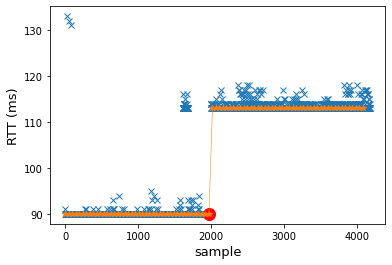

In [18]:
y = [eval(x.split(" ")[1]) for x in data]
windowSize = 48
jump1 = 20
plotPeeringDataForTwoWindow(y, windowSize, jump1, file=f'/n/fs/scratch/djubas/neu-ireland-{windowSize}-{jump1}.png')